Fuente código: Coursera, código mejorado y usado por Fernando Gutiérrez - Curso de Mineria de datos UCC-2023-2.

# Analizando los datos

| Field Name     | Field Description                                                                                                     |
|----------------|-----------------------------------------------------------------------------------------------------------------------|
| Fyear          | Año                                                                                                                   |
| Gvkey          |   LLave identificadora campo fraude                                                                                                                    |
| P_aaer         | La variable "p_aaer" se utiliza para gestionar el problema del fraude en serie. El fraude contable puede abarcar varios períodos consecutivos de presentación de informes, creando una situación del llamado “fraude en serie” |
| Misstate       | Etiqueta de fraude (1 indica fraude y 0 indica no fraude)                                                             |
| act            | Activos circulantes, total                                                                                           |
| ap             | Cuentas por pagar, Comercio                                                                                         |
| at             | Activos, Total                                                                                                       |
| ceq            | Patrimonio común/ordinario, total                                                                                   |
| che            | Efectivo e inversiones a corto plazo                                                                                |
| cogs           | Costo de los bienes vendidos                                                                                        |
| csho           | Acciones ordinarias en circulación                                                                                  |
| dlc            | Deuda en pasivos corrientes, total                                                                                  |
| dltis          | Emisión de deuda a largo plazo                                                                                     |
| dltt           | Deuda a largo plazo, total                                                                                          |
| dp             | Depreciación y Amortización                                                                                         |
| ib             | Ingresos antes de partidas extraordinarias                                                                          |
| invt           | Inventarios, Total                                                                                                  |
| ivao           | Inversiones y Anticipos, Otros                                                                                      |
| ivst           | Inversiones a corto plazo, total                                                                                    |
| lct            | Pasivos corrientes, total                                                                                           |
| lt             | Pasivos, Total                                                                                                      |
| ni             | Utilidad (Pérdida) Neta                                                                                             |
| ppegt          | Propiedades, Planta y Equipo, Total                                                                                 |
| pstk           | Acciones preferentes/preferentes (capital), total                                                                    |
| re             | Ganancias retenidas                                                                                                 |
| rect           | Cuentas por cobrar, total                                                                                           |
| sale           | Ventas/facturación (neto)                                                                                           |
| sstk           | Venta de acciones ordinarias y preferentes                                                                          |
| txp            | Impuestos sobre la renta a pagar                                                                                    |
| txt            | Impuestos sobre la renta, total                                                                                     |
| xint           | Intereses y gastos relacionados, total                                                                              |
| prcc_f         | Precio de cierre, anual, fiscal                                                                                     |
| dch_wc         | Acumulaciones de WC                                                                                                |
| ch_rsst        | Acumulaciones RSST                                                                                                  |
| dch_rec        | Cambio en cuentas por cobrar                                                                                        |
| dch_inv        | Cambio en el inventario                                                                                             |
| soft_assets    | % Activos blandos                                                                                                   |
| ch_cs          | Cambio en las ventas en efectivo                                                                                    |
| ch_cm          | Cambio en el margen de efectivo                                                                                     |
| ch_roa         | Cambio en el rendimiento de los activos                                                                             |
| issue          | Emisión efectiva                                                                                                    |
| bm             | Reserva al mercado                                                                                                  |
| dpi            | Índice de depreciación                                                                                              |
| reoa           | Ganancias retenidas sobre activos totales                                                                           |
| EBIT           | Ganancias antes de intereses e impuestos sobre activos totales                                                       |
| ch_fcf         | Cambio en los flujos de efectivo libres                                                                             |


In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importar librerias

import pandas as pd # módulo para tratamiento de datos
import numpy as np # módulo para tratamiento de matrices
import missingno as msno # librería para tratamiento de datos perdidos
import matplotlib.pyplot as plt # módulo graficador
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Informacion de los Datos fraude financiero dataset
data = pd.read_csv("data_FraudDetection_JAR2020.csv")
data.sample(10)

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
68400,2001,27795,NaN,0,4.770,0.610,9.399,8.474,4.720,2.395,...,0.304394,NaN,NaN,NaN,1,0.188408,NaN,-0.714544,-0.404192,NaN
1697,1990,7883,NaN,0,60.808,2.256,77.147,64.311,28.651,30.034,...,0.519087,0.096193,-0.024063,-0.031427,1,0.993871,0.937225,0.694946,0.093834,-0.033439
124556,2011,10787,NaN,0,6433.000,1278.000,26777.000,14182.000,1450.000,9423.000,...,0.794562,0.017199,0.094429,0.021323,1,0.749046,0.914450,0.060649,0.086007,-0.004860
130075,2012,12466,NaN,0,0.000,18.866,0.000,-41.201,0.000,0.000,...,NaN,NaN,NaN,NaN,0,-3.578619,NaN,NaN,NaN,NaN
106702,2007,165740,NaN,0,14.047,0.579,20.520,11.370,7.103,13.687,...,0.444493,-0.484008,0.138137,0.106563,1,1.470373,1.744023,-1.706725,-0.396832,0.602877
67059,2001,12597,NaN,0,39.545,4.759,42.417,18.727,1.761,62.604,...,0.906193,0.055128,1.598920,0.018015,1,0.762259,1.100460,0.290898,0.087182,-0.009057
32489,1996,5558,NaN,0,518.344,111.851,1105.103,374.256,36.727,1686.961,...,0.548930,NaN,NaN,0.042149,0,4.365287,0.959469,0.120273,0.013952,0.069416
12245,1992,13057,NaN,0,19.395,0.000,21.152,18.384,11.137,26.735,...,0.404075,0.118656,-0.104858,0.024117,1,0.573704,0.976400,0.594554,0.203290,-0.063974
86366,2004,27810,NaN,0,89.853,6.620,98.855,75.596,61.476,12.301,...,0.288554,-0.037217,-0.047523,-0.206393,1,0.080938,1.195146,-1.320854,-0.118841,-0.468874
57944,1999,111205,NaN,0,51.385,21.462,56.936,-2.071,2.996,58.080,...,0.873173,-0.099657,0.225363,-0.262375,1,-0.023509,0.900359,-1.571782,-0.573187,-0.106332


# Tamaño del dataset

In [4]:
data.shape

(146045, 46)

# Información datos

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        146045 non-null  int64  
 1   gvkey        146045 non-null  int64  
 2   p_aaer       964 non-null     float64
 3   misstate     146045 non-null  int64  
 4   act          146045 non-null  float64
 5   ap           146045 non-null  float64
 6   at           146045 non-null  float64
 7   ceq          146045 non-null  float64
 8   che          146045 non-null  float64
 9   cogs         146045 non-null  float64
 10  csho         146045 non-null  float64
 11  dlc          146045 non-null  float64
 12  dltis        146045 non-null  float64
 13  dltt         146045 non-null  float64
 14  dp           146045 non-null  float64
 15  ib           146045 non-null  float64
 16  invt         146045 non-null  float64
 17  ivao         146045 non-null  float64
 18  ivst         146045 non-

# Informe estadístico

In [6]:
# Empezamos realizando un análisis descriptivo de las variables para entender sus dimensiones
data.describe()

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
count,146045.000000,146045.000000,964.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,...,145453.000000,130127.000000,128938.000000,133367.000000,146045.000000,146027.000000,136817.000000,145454.000000,145454.000000,140638.000000
mean,2002.011702,54243.435516,2503.840249,0.006601,737.847759,181.993488,2374.041576,887.126243,218.657186,1302.280756,...,0.499790,0.185169,-0.090980,-0.010208,0.863487,0.466137,1.042207,-3.191197,-0.238754,-0.008842
std,6.959894,59937.455765,912.093250,0.080976,3744.542368,1047.546104,11957.736980,5056.948150,1330.490185,7870.665783,...,0.274129,1.383354,2.844807,0.379574,0.343333,1.314661,0.495286,12.932219,1.059134,0.548216
min,1990.000000,1004.000000,371.000000,0.000000,-0.254000,0.000000,0.000000,-25560.000000,-34.000000,-366.645000,...,0.004515,-6.484197,-17.359699,-1.671565,0.000000,-7.034304,0.151757,-89.013245,-7.016393,-2.980601
25%,1996.000000,10658.000000,1803.000000,0.000000,8.277000,1.151000,18.281000,6.337000,1.144000,6.795000,...,0.270023,-0.073635,-0.260164,-0.058635,1.000000,0.191546,0.854248,-0.894633,-0.128135,-0.123402
50%,2002.000000,25088.000000,2620.500000,0.000000,47.501000,6.462000,105.346000,47.308000,9.373000,53.382000,...,0.524640,0.067918,-0.023205,-0.001893,1.000000,0.442172,0.974302,-0.008046,0.043701,-0.026155
75%,2008.000000,66586.000000,3180.000000,0.000000,249.832000,42.259000,672.929000,271.547000,60.286000,372.730000,...,0.726663,0.250237,0.139960,0.042188,1.000000,0.805320,1.097582,0.229724,0.108059,0.062294
max,2014.000000,317264.000000,3996.000000,1.000000,152629.000000,39903.000000,410074.000000,284434.000000,85709.000000,435726.253000,...,0.993599,9.600000,16.573810,1.621628,1.000000,4.937457,4.036458,0.784573,0.550619,4.061810


# Revisar Fraude

In [7]:
#Contar tipo de fraudes
data.gvkey.value_counts()

2049      25
9919      25
6335      25
15291     25
6334      25
          ..
138346     1
189557     1
20147      1
165113     1
20798      1
Name: gvkey, Length: 18444, dtype: int64

In [8]:
#comprobando cuantos fraudes hay
data['misstate'].value_counts()

0    145081
1       964
Name: misstate, dtype: int64

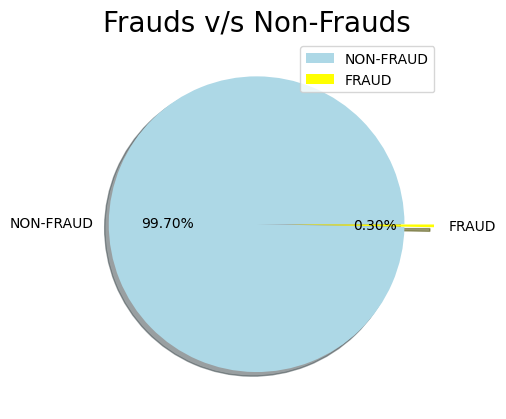

In [9]:
# checking the no. of frauds in the dataset
data['misstate'].value_counts()

# plotting a pie chart to represent the fraction of the frauds

size = [2762196, 8213]
labels = ['NON-FRAUD', 'FRAUD']
colors = ['lightblue', 'yellow']
explode = [0, 0.2]

plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, autopct='%.2f%%')
plt.title('Frauds v/s Non-Frauds', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()


# Verificar valores nulos

Matrix missing: Mostramos una matriz de calor para visualizar las variables con mayor presencia de valores perdidos. Las líneas blancas indican los valores faltantes en cada columna.

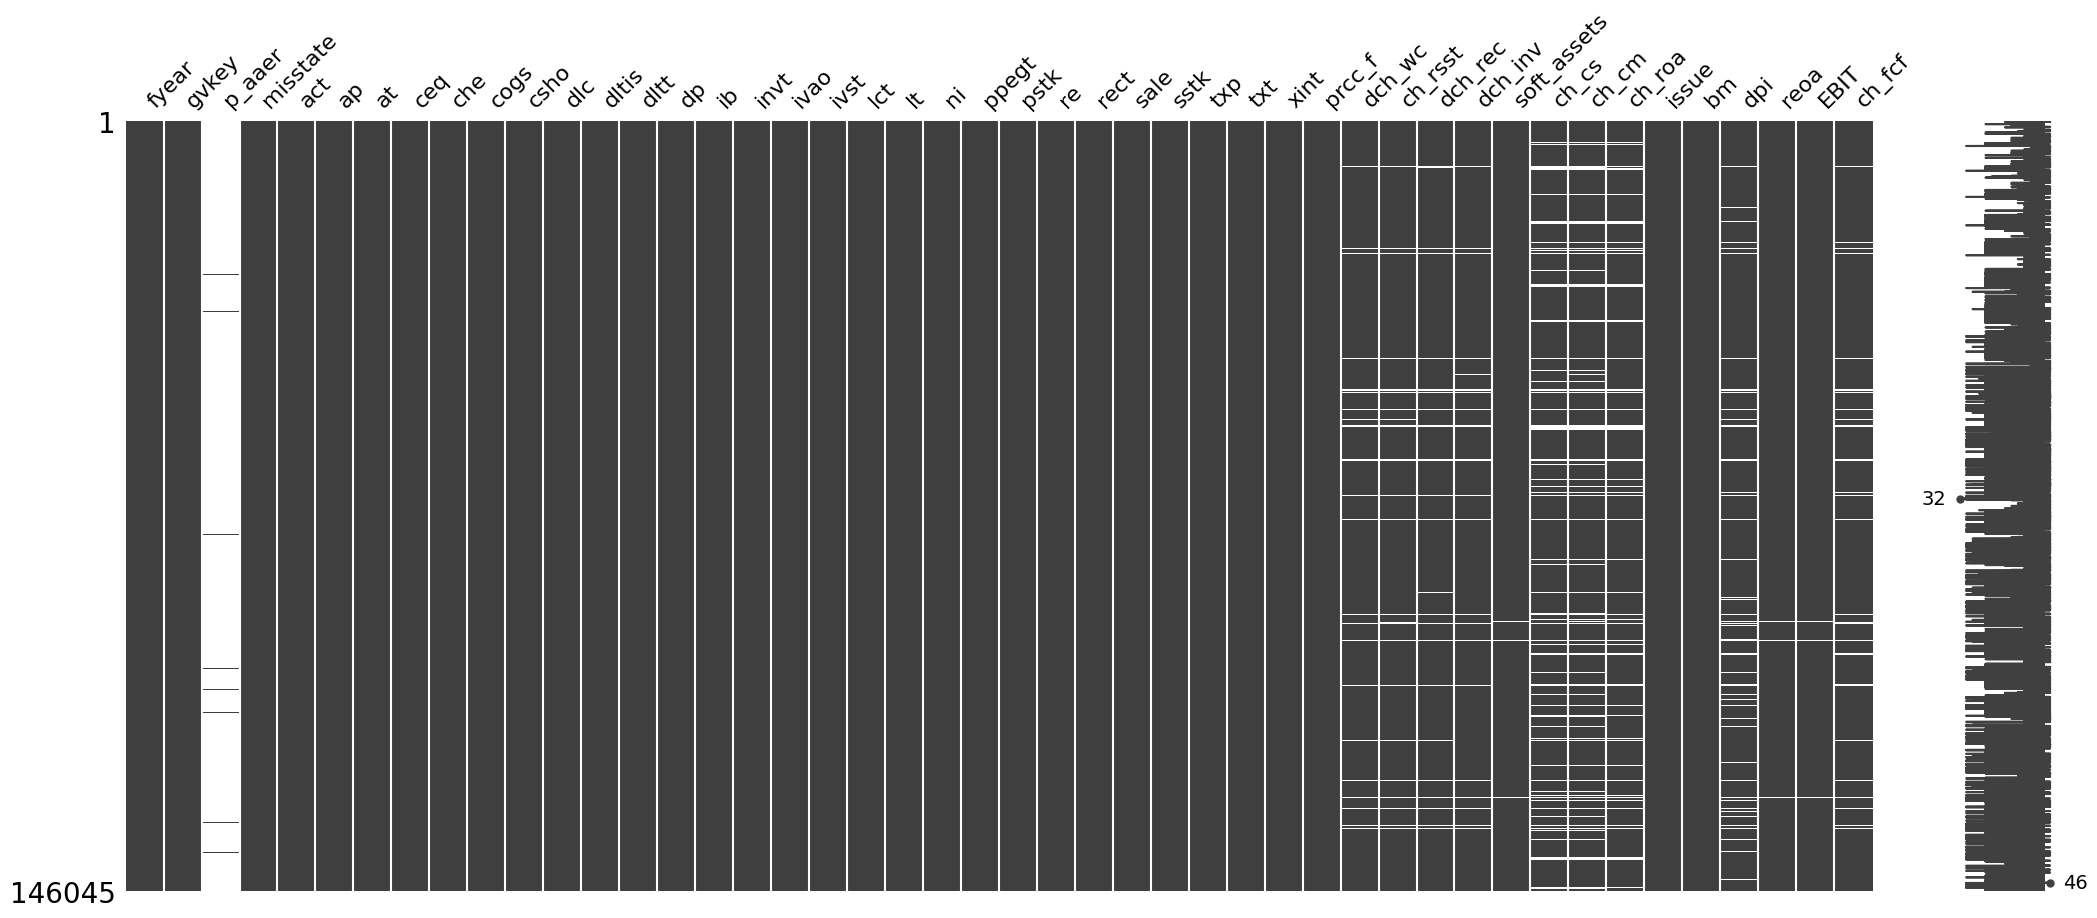

In [10]:
# matrix missing
msno.matrix(data)

In [11]:
#Verifico los datos faltantes del dataset o nulos
data.isnull().sum()

fyear               0
gvkey               0
p_aaer         145081
misstate            0
act                 0
ap                  0
at                  0
ceq                 0
che                 0
cogs                0
csho                0
dlc                 0
dltis               0
dltt                0
dp                  0
ib                  0
invt                0
ivao                0
ivst                0
lct                 0
lt                  0
ni                  0
ppegt               0
pstk                0
re                  0
rect                0
sale                0
sstk                0
txp                 0
txt                 0
xint                0
prcc_f              0
dch_wc           4759
ch_rsst          4851
dch_rec          4743
dch_inv          4615
soft_assets       592
ch_cs           15918
ch_cm           17107
ch_roa          12678
issue               0
bm                 18
dpi              9228
reoa              591
EBIT              591
ch_fcf    

In [12]:
# explorando la cantidad de valores perdidos en las variables
data.isna().sum()/data.shape[0]*100

fyear           0.000000
gvkey           0.000000
p_aaer         99.339929
misstate        0.000000
act             0.000000
ap              0.000000
at              0.000000
ceq             0.000000
che             0.000000
cogs            0.000000
csho            0.000000
dlc             0.000000
dltis           0.000000
dltt            0.000000
dp              0.000000
ib              0.000000
invt            0.000000
ivao            0.000000
ivst            0.000000
lct             0.000000
lt              0.000000
ni              0.000000
ppegt           0.000000
pstk            0.000000
re              0.000000
rect            0.000000
sale            0.000000
sstk            0.000000
txp             0.000000
txt             0.000000
xint            0.000000
prcc_f          0.000000
dch_wc          3.258585
ch_rsst         3.321579
dch_rec         3.247629
dch_inv         3.159985
soft_assets     0.405355
ch_cs          10.899380
ch_cm          11.713513
ch_roa          8.680886


Columna "p_aaer": Esta columna tiene un alto porcentaje de valores perdidos (99.34%). Dado que la mayoría de los datos en esta columna son valores perdidos, es posible que desees considerar eliminarla por completo, ya que es poco probable que proporcione información útil para tu análisis.

Columnas con Valores Perdidos Moderados: Algunas columnas, como "dch_wc", "ch_rsst", "dch_rec", "dch_inv", "ch_cs", "ch_cm", "ch_roa" y "ch_fcf", tienen porcentajes moderados de valores perdidos que oscilan entre el 3% y el 11%. Puedes considerar diferentes enfoques para manejar estos valores perdidos, como la imputación, dependiendo de la importancia de estas columnas para tu análisis.

Otras Columnas: Las columnas restantes no tienen valores perdidos o tienen porcentajes muy bajos de valores perdidos.

In [13]:
data.isin([0]).sum()

fyear               0
gvkey               0
p_aaer              0
misstate       145081
act               847
ap               1403
at                591
ceq                78
che              4774
cogs             8302
csho               18
dlc             35443
dltis           71251
dltt            39430
dp               4401
ib                133
invt            39785
ivao            97276
ivst            92420
lct               145
lt                126
ni                 63
ppegt            3884
pstk           125026
re                154
rect             7333
sale            10402
sstk            39246
txp             86648
txt             35309
xint            16568
prcc_f              3
dch_wc            108
ch_rsst            37
dch_rec          5203
dch_inv         35388
soft_assets         0
ch_cs              84
ch_cm             137
ch_roa              4
issue           19937
bm                 76
dpi                 0
reoa              149
EBIT               25
ch_fcf    

Al revisar los datos por sumas de ceros, observamos columnas de datos que pueden presentar ceros en su caracterización, por lo cual debemos establecer una política para lidiar con estos.

# Eliminar columnas

Se eliminaron las columnas gvkey y p_aaer

<li>La variable "gvkey" identificador del fraude</li>
<li>La variable "p_aaer" se utiliza para gestionar el problema del fraude en serie. El fraude contable puede abarcar varios períodos consecutivos de presentación de informes, creando una situación del llamado “fraude en serie”</li>
<li>fyear año del fraude</li>
<li>misstate etiqueta que identifica el fraude: cero (no fraude) y uno (fraude)</li>

In [14]:
data = data.drop(['gvkey', 'p_aaer', 'fyear'], axis='columns')
data.head(10)

,misstate,act,ap,at,ceq,che,cogs,csho,dlc,dltis,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,32.853,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,2.017,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,6.500,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,0.587,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,0.000,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349
5,0,148.396,24.301,328.495,111.015,8.478,153.262,11.235,44.339,0.273,...,0.688689,0.040056,0.092675,0.003067,1,0.389406,0.851688,0.191741,0.105527,-0.034367
6,0,637.880,199.012,1011.901,324.132,113.271,1185.288,28.489,22.444,60.769,...,0.754448,-0.033881,-0.372440,-0.040405,1,1.379084,0.955720,-0.038167,0.055174,-0.042160
7,0,396.594,92.140,677.736,183.566,50.125,596.137,46.758,80.971,1.146,...,0.819713,0.047023,-0.061932,-0.108796,1,1.847471,0.964188,-0.192385,-0.031264,-0.041039
8,0,2657.800,966.300,13353.600,3727.400,949.300,10908.200,62.300,1319.100,2264.600,...,0.243882,0.117693,-0.369057,-0.047424,1,1.236793,0.996031,0.181389,0.022773,-0.038199
9,0,0.004,0.000,0.126,-0.778,0.000,0.000,9.928,0.624,0.132,...,0.809524,NaN,NaN,-1.520085,1,-0.156728,NaN,-22.174603,-7.016393,0.118902


# Técnicas de imputación de datos

Imputación Basada en Reglas de Negocio: Reemplazar los valores faltantes con cero

In [15]:
# Lista de las columnas que tienen valores perdidos
columnas_imputar = ['dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv', 'ch_cs', 'ch_cm', 'ch_roa', 'bm', 'reoa', 'EBIT', 'ch_fcf', 'soft_assets', 'dpi']
#Reemplazar los valores nulos con -1 en las columnas seleccionados
data[columnas_imputar] = data[columnas_imputar].fillna(0)

In [16]:
# Después de la imputación
print(data[columnas_imputar].isnull().sum())

dch_wc         0
ch_rsst        0
dch_rec        0
dch_inv        0
ch_cs          0
ch_cm          0
ch_roa         0
bm             0
reoa           0
EBIT           0
ch_fcf         0
soft_assets    0
dpi            0
dtype: int64


In [17]:
# Itera a través de las columnas del DataFrame y verifica el equilibrio
for columna in data.columns:
    if data[columna].dtype == 'object':
        # Si es una variable categórica, verifica el equilibrio de las categorías
        counts = data[columna].value_counts()
        print(f"Variable categórica: {columna}")
        print(counts)
    elif data[columna].dtype in ['int64', 'float64']:
        # Si es una variable numérica, puedes calcular estadísticas descriptivas
        descripcion = data[columna].describe()
        print(f"Variable numérica: {columna}")
        print(descripcion)
    print('-' * 40)

Variable numérica: misstate
count    146045.000000
mean          0.006601
std           0.080976
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: misstate, dtype: float64
----------------------------------------
Variable numérica: act
count    146045.000000
mean        737.847759
std        3744.542368
min          -0.254000
25%           8.277000
50%          47.501000
75%         249.832000
max      152629.000000
Name: act, dtype: float64
----------------------------------------
Variable numérica: ap
count    146045.000000
mean        181.993488
std        1047.546104
min           0.000000
25%           1.151000
50%           6.462000
75%          42.259000
max       39903.000000
Name: ap, dtype: float64
----------------------------------------
Variable numérica: at
count    146045.000000
mean       2374.041576
std       11957.736980
min           0.000000
25%          18.281000
50%         105.346000
75%       

In [18]:
data.isna().sum()

misstate       0
act            0
ap             0
at             0
ceq            0
che            0
cogs           0
csho           0
dlc            0
dltis          0
dltt           0
dp             0
ib             0
invt           0
ivao           0
ivst           0
lct            0
lt             0
ni             0
ppegt          0
pstk           0
re             0
rect           0
sale           0
sstk           0
txp            0
txt            0
xint           0
prcc_f         0
dch_wc         0
ch_rsst        0
dch_rec        0
dch_inv        0
soft_assets    0
ch_cs          0
ch_cm          0
ch_roa         0
issue          0
bm             0
dpi            0
reoa           0
EBIT           0
ch_fcf         0
dtype: int64

# Mezclar el dataset

In [19]:
#Mezclar el dataset
data = data.sample(frac=1).reset_index(drop=True)
data.head(10)

,misstate,act,ap,at,ceq,che,cogs,csho,dlc,dltis,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,0,1382.395,277.773,1935.416,1275.425,576.708,1196.441,47.500,0.000,0.000,...,0.514219,0.000000,0.000000,0.000000,0,3.452180,1.032243,0.471384,0.232736,-0.113003
1,0,6.799,3.217,10.025,4.131,1.535,63.282,18.002,0.669,0.000,...,0.828928,-0.107679,0.340759,0.043538,0,0.254972,0.972959,0.015960,-0.160399,0.016854
2,0,12.908,15.617,149.886,65.966,0.000,10.461,20.632,0.000,22.341,...,0.095593,0.104999,-0.067882,-0.043546,1,0.770426,1.046593,0.284810,0.092464,-0.175755
3,0,1.631,0.000,1.640,1.209,1.338,0.117,0.977,0.380,0.000,...,0.184146,-0.340502,-0.527386,0.348124,1,0.638855,0.000000,-0.756098,0.130488,0.416881
4,0,44.267,0.347,58.886,46.954,43.753,11.011,9.525,1.040,9.329,...,0.008780,-0.475777,1.850297,0.048476,1,0.323249,2.191410,-0.587355,-0.144500,-0.635474
5,0,111.362,9.364,551.673,183.578,33.349,15.569,31.497,15.666,0.000,...,0.303887,-0.141328,-0.141178,0.024051,0,0.400855,1.064911,0.032606,0.229304,0.101705
6,0,8.987,2.091,18.693,6.708,2.061,15.616,5.761,2.388,1.246,...,0.655165,0.730097,0.833010,-0.419020,1,0.955194,0.893410,-0.392714,-0.456802,-0.106835
7,0,76.019,24.362,445.981,246.193,0.059,239.630,42.058,6.846,13.696,...,0.176187,0.000000,0.000000,0.000000,1,0.421885,1.107202,0.248208,0.170646,-0.434461
8,0,63.793,30.868,191.531,46.744,3.558,151.233,17.017,30.600,0.000,...,0.491001,0.179430,0.312199,-0.012512,1,0.713481,0.899344,-0.162835,-0.009920,-0.086539
9,0,5.156,0.727,24.964,5.434,2.109,23.567,5.743,2.594,11.908,...,0.387438,-0.247914,1.962471,0.093422,1,0.688142,1.120183,-0.250841,0.106313,-0.094477


<h2 id="pattern_visualization">2. Análisis de patrones de características individuales mediante visualización</h2>
- Para instalar seaborn usamos  pip que es el administrador de paquetes de python.

### calcular la correlación entre variables de tipo “int64” o “float64” utilizando el método “corr”:

In [20]:
corr = data.corr()
# Aplica un mapa de colores a la tabla
corr.style.background_gradient("RdYlGn", low=-1, high=1)

# Imprime la tabla
print(corr)

             misstate       act        ap        at       ceq       che  \
misstate     1.000000  0.022300  0.027725  0.021769  0.021051  0.015030   
act          0.022300  1.000000  0.837398  0.878315  0.781781  0.824967   
ap           0.027725  0.837398  1.000000  0.814882  0.714306  0.606061   
at           0.021769  0.878315  0.814882  1.000000  0.922935  0.696252   
ceq          0.021051  0.781781  0.714306  0.922935  1.000000  0.674905   
che          0.015030  0.824967  0.606061  0.696252  0.674905  1.000000   
cogs         0.019290  0.775588  0.893112  0.766761  0.688589  0.499444   
csho         0.014707  0.380716  0.320160  0.422942  0.431327  0.387291   
dlc          0.010195  0.756073  0.626860  0.732312  0.589192  0.504066   
dltis        0.012666  0.443239  0.432536  0.502433  0.410146  0.295679   
dltt         0.023159  0.704906  0.646234  0.869181  0.688693  0.540087   
dp           0.012092  0.734202  0.727898  0.897125  0.828959  0.581175   
ib          -0.001749  0.

In [21]:
# Visualizar la relación entre todas las variables utilizando una matriz de diagramas de dispersión
#sns.pairplot(data)

In [22]:
#Guardamos el dataset- Hacemos una clasificacion binaria.
data.to_csv('fraude1.csv', index=False)

# Nuevo conjunto de datos fraude1

In [23]:
data1 = pd.read_csv('fraude1.csv')
data1.sample(10)

,misstate,act,ap,at,ceq,che,cogs,csho,dlc,dltis,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
56744,0,2409.000,1001.000,20796.000,3996.000,102.000,4597.000,207.972,3552.000,1200.000,...,0.624736,0.051921,-0.120079,0.042724,1,0.395149,1.568173,0.061887,0.092422,-0.005828
106407,0,353.698,29.629,659.943,528.615,231.256,179.268,63.928,0.000,0.000,...,0.563547,0.538036,0.133934,0.121560,1,0.378700,0.801489,0.618264,0.120210,-0.012355
48165,0,39.532,49.273,266.886,-30.499,4.707,96.391,13.968,0.420,0.000,...,0.969650,0.033236,-0.119418,0.002070,0,-5.325587,1.142440,-0.154988,-0.008993,0.005443
89331,0,216.149,66.110,734.955,319.252,0.004,611.898,28.255,2.294,0.000,...,0.718542,0.016755,-0.220362,-0.039051,1,0.557973,0.850714,0.110295,0.055516,-0.047836
139536,0,11.293,1.375,15.695,7.437,6.278,5.492,11.326,0.044,0.000,...,0.469258,-0.041136,-0.192314,0.620647,1,0.284256,0.818557,-1.642625,0.162918,-0.231594
14075,0,8.267,0.288,9.490,8.060,3.348,4.268,3.982,0.119,0.000,...,0.570179,-0.429473,-0.218233,-0.105361,0,0.852256,0.888368,0.668704,-0.099368,-0.125105
107067,0,1724.904,133.750,2023.514,1500.688,1299.572,618.237,80.457,0.000,0.000,...,0.328375,0.837643,-0.260902,0.074607,1,0.304772,1.483013,0.144664,0.122871,-0.195874
67204,0,12.083,2.275,38.327,32.517,8.514,4.204,14.341,0.000,0.000,...,0.762230,-0.408797,16.249063,-0.201051,1,0.921713,1.583268,-1.775041,-0.148303,-0.544297
93195,0,158.802,19.443,335.480,180.994,144.531,10.369,36.628,0.000,67.629,...,0.052569,-1.383253,-1.609690,-0.031965,1,0.837527,0.151757,-0.039722,-0.051213,-0.640872
8434,0,1.822,1.802,12.596,9.487,1.331,11.986,12.630,0.000,0.000,...,0.803906,1.035714,-0.652795,0.045938,1,0.556406,0.810911,-10.156558,-0.905684,0.402578


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X= data1.drop('misstate', axis=1) 
y = data1['misstate']

In [26]:
#Ahora eempezamos a construir el modelo, separamos los datos de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102231 entries, 83313 to 121958
Data columns (total 42 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   act          102231 non-null  float64
 1   ap           102231 non-null  float64
 2   at           102231 non-null  float64
 3   ceq          102231 non-null  float64
 4   che          102231 non-null  float64
 5   cogs         102231 non-null  float64
 6   csho         102231 non-null  float64
 7   dlc          102231 non-null  float64
 8   dltis        102231 non-null  float64
 9   dltt         102231 non-null  float64
 10  dp           102231 non-null  float64
 11  ib           102231 non-null  float64
 12  invt         102231 non-null  float64
 13  ivao         102231 non-null  float64
 14  ivst         102231 non-null  float64
 15  lct          102231 non-null  float64
 16  lt           102231 non-null  float64
 17  ni           102231 non-null  float64
 18  ppegt        102231 

# Técnicas de escalado

La elección entre las técnicas de escalado de características como RobustScaler, StandardScaler y MinMaxScaler depende de la naturaleza de tus datos y los requisitos de tu modelo de machine learning. Cada técnica tiene sus propias características y es adecuada para diferentes situaciones. Aquí hay una guía general sobre cuándo usar cada una:

**RobustScaler**:
- *Cuándo usarlo*: Utiliza RobustScaler cuando tus datos contienen valores atípicos o anomalías. RobustScaler es resistente a los valores extremos y utiliza estadísticas robustas como la mediana y el rango intercuartílico para escalar los datos.
- *Ventajas*: Bueno para datos con valores atípicos, ya que no se ven afectados por ellos.
- *Consideraciones*: No restringe los datos a un rango específico como MinMaxScaler, por lo que los datos pueden tener una mayor dispersión.

**StandardScaler (Z-Score Scaling)**:
- *Cuándo usarlo*: Utiliza StandardScaler cuando tus datos sigan una distribución normal o aproximadamente normal. Es una opción sólida para muchas técnicas de machine learning, como regresión lineal, SVM y algoritmos basados en gradiente.
- *Ventajas*: Transforma los datos para que tengan una media de cero y una desviación estándar de uno, lo que puede ser beneficioso para algoritmos que asumen normalidad.
- *Consideraciones*: Puede verse afectado por valores atípicos y no es adecuado para datos que no siguen una distribución normal.

**MinMaxScaler**:
- *Cuándo usarlo*: Utiliza MinMaxScaler cuando desees que tus datos se escalen a un rango específico, generalmente entre 0 y 1. Es útil para algoritmos que requieren que los datos estén en un rango acotado, como las redes neuronales y los algoritmos de clustering basados en distancia.
- *Ventajas*: Escala los datos al rango deseado, lo que puede mejorar la convergencia en algunos algoritmos.
- *Consideraciones*: Sensible a valores atípicos si los valores extremos están presentes.

La elección de la técnica depende de la naturaleza de tus datos y del algoritmo que planeas usar. Aquí hay algunas pautas generales:

- Si tienes valores atípicos en tus datos y deseas ser resistente a ellos, considera RobustScaler.
- Si tus datos siguen una distribución normal y planeas utilizar algoritmos que asumen normalidad, elige StandardScaler.
- Si deseas que tus datos estén en un rango específico, como [0, 1], usa MinMaxScaler.


In [28]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /anaconda/envs/azureml_py38/lib/python3.8/site-packages (1.3.2)
Note: you may need to restart the kernel to use updated packages.


# MinMaxScaler

In [29]:
from sklearn import preprocessing
fraud_value = data1.copy().values
min_max_scaler = preprocessing.MinMaxScaler()
fraud_scaled = min_max_scaler.fit_transform(fraud_value)
fraud_df_scaled = pd.DataFrame(fraud_scaled, columns=data1.columns)
fraud_df_scaled

,misstate,act,ap,at,ceq,che,cogs,csho,dlc,dltis,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,0.0,0.009059,0.006961,0.004720,0.086568,0.007123,0.003584,0.000475,9.132653e-07,0.000104,...,0.517532,0.403141,0.511580,0.507582,0.0,0.875935,0.255730,0.996512,0.957991,0.407190
1,0.0,0.000046,0.000081,0.000024,0.082467,0.000414,0.000986,0.000180,9.767969e-06,0.000104,...,0.834268,0.396446,0.521622,0.520802,0.0,0.608873,0.241043,0.991441,0.906037,0.425629
2,0.0,0.000086,0.000391,0.000366,0.082666,0.000397,0.000865,0.000206,9.132653e-07,0.000223,...,0.096209,0.409669,0.509579,0.494359,1.0,0.651928,0.259285,0.994435,0.939454,0.398279
3,0.0,0.000012,0.000000,0.000004,0.082457,0.000412,0.000841,0.000010,5.942843e-06,0.000104,...,0.185333,0.381971,0.496038,0.613292,1.0,0.640938,0.000000,0.982843,0.944479,0.482432
4,0.0,0.000292,0.000009,0.000144,0.082605,0.000907,0.000866,0.000095,1.467842e-05,0.000154,...,0.008836,0.373560,0.566107,0.522302,1.0,0.614576,0.542904,0.984722,0.908138,0.333001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146040,0.0,0.001202,0.002177,0.007144,0.084952,0.000802,0.001207,0.001002,1.187245e-05,0.001987,...,0.119804,0.390884,0.509329,0.566483,1.0,0.659725,0.560116,0.985316,0.933878,0.454865
146041,0.0,0.009497,0.016380,0.032657,0.109108,0.004020,0.003856,0.003341,1.140364e-03,0.000104,...,0.107423,0.403141,0.511580,0.507582,0.0,0.753523,0.227906,0.995560,0.931722,0.426101
146042,0.0,0.000847,0.000597,0.000442,0.082661,0.001526,0.001592,0.000636,9.132653e-07,0.000104,...,0.225753,0.411097,0.535305,0.756023,1.0,0.604432,0.338330,0.981522,0.910541,0.556772
146043,0.0,0.000156,0.000101,0.000124,0.082592,0.000531,0.000872,0.000227,2.753032e-06,0.000104,...,0.563527,0.390011,0.529166,0.799942,1.0,0.663625,0.144688,0.988310,0.880336,0.437103


In [30]:
fraud_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 43 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   misstate     146045 non-null  float64
 1   act          146045 non-null  float64
 2   ap           146045 non-null  float64
 3   at           146045 non-null  float64
 4   ceq          146045 non-null  float64
 5   che          146045 non-null  float64
 6   cogs         146045 non-null  float64
 7   csho         146045 non-null  float64
 8   dlc          146045 non-null  float64
 9   dltis        146045 non-null  float64
 10  dltt         146045 non-null  float64
 11  dp           146045 non-null  float64
 12  ib           146045 non-null  float64
 13  invt         146045 non-null  float64
 14  ivao         146045 non-null  float64
 15  ivst         146045 non-null  float64
 16  lct          146045 non-null  float64
 17  lt           146045 non-null  float64
 18  ni           146045 non-

# RobustScaler

In [31]:
from sklearn import preprocessing
fraud_value_1 = data1.copy().values
robust_scaler = preprocessing.RobustScaler()
fraud_scaled_1 = robust_scaler.fit_transform(fraud_value_1)
fraud_df_scaled_1 = pd.DataFrame(fraud_scaled_1, columns=data1.columns)
fraud_df_scaled_1

,misstate,act,ap,at,ceq,che,cogs,csho,dlc,dltis,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,0.0,5.526253,6.599956,2.795502,4.630734,9.592760,3.123667,0.480554,-0.106969,-0.002533,...,-0.018772,-0.147917,0.000000,0.000000,-1.0,4.904226,0.261471,0.427948,0.808314,-0.530614
1,0.0,-0.168500,-0.078938,-0.145606,-0.162803,-0.132528,0.027054,-0.087370,-0.054466,-0.002533,...,0.666098,-0.555226,1.108737,0.526704,-1.0,-0.304856,0.042101,0.019536,-0.867365,0.221936
2,0.0,-0.143210,0.222706,0.068037,0.070352,-0.158483,-0.117291,-0.036735,-0.106969,0.895670,...,-0.929788,0.249255,-0.220869,-0.526804,0.0,0.534953,0.314568,0.260633,0.210424,-0.894274
3,0.0,-0.189895,-0.157196,-0.158415,-0.173821,-0.135859,-0.145559,-0.415152,-0.077146,-0.002533,...,-0.737077,-1.435903,-1.715971,4.211497,0.0,0.320590,-3.558144,-0.672824,0.372496,2.540181
4,0.0,-0.013388,-0.148755,-0.070969,-0.001335,0.581313,-0.115788,-0.250578,-0.025349,0.372532,...,-1.118711,-1.947598,6.020367,0.586446,0.0,-0.193613,4.550739,-0.521501,-0.799596,-3.558448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146040,0.0,0.561508,1.955970,4.313963,2.742378,0.429728,0.290073,1.497882,-0.041987,14.289792,...,-0.878768,-0.893621,-0.248536,2.346616,0.0,0.687025,4.807820,-0.473690,0.030608,1.415140
146041,0.0,5.802778,15.742848,20.295301,30.977414,5.095262,3.447776,6.004216,6.649349,-0.002533,...,-0.905540,-0.147917,0.000000,0.000000,-1.0,2.516567,-0.154106,0.351241,-0.038948,0.241195
146042,0.0,0.337613,0.422643,0.115648,0.064711,1.478357,0.749562,0.791240,-0.106969,-0.002533,...,-0.649678,0.336140,2.619462,9.897935,0.0,-0.391469,1.495203,-0.779219,-0.722088,5.574172
146043,0.0,-0.099352,-0.058991,-0.083089,-0.016432,0.036624,-0.108426,0.002695,-0.096060,-0.002533,...,0.080681,-0.946762,1.941736,11.647658,0.0,0.763091,-1.397061,-0.232557,-1.696324,0.690227


In [32]:
fraud_df_scaled_1.head()

,misstate,act,ap,at,ceq,che,cogs,csho,dlc,dltis,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,0.0,5.526253,6.599956,2.795502,4.630734,9.592760,3.123667,0.480554,-0.106969,-0.002533,...,-0.018772,-0.147917,0.000000,0.000000,-1.0,4.904226,0.261471,0.427948,0.808314,-0.530614
1,0.0,-0.168500,-0.078938,-0.145606,-0.162803,-0.132528,0.027054,-0.087370,-0.054466,-0.002533,...,0.666098,-0.555226,1.108737,0.526704,-1.0,-0.304856,0.042101,0.019536,-0.867365,0.221936
2,0.0,-0.143210,0.222706,0.068037,0.070352,-0.158483,-0.117291,-0.036735,-0.106969,0.895670,...,-0.929788,0.249255,-0.220869,-0.526804,0.0,0.534953,0.314568,0.260633,0.210424,-0.894274
3,0.0,-0.189895,-0.157196,-0.158415,-0.173821,-0.135859,-0.145559,-0.415152,-0.077146,-0.002533,...,-0.737077,-1.435903,-1.715971,4.211497,0.0,0.320590,-3.558144,-0.672824,0.372496,2.540181
4,0.0,-0.013388,-0.148755,-0.070969,-0.001335,0.581313,-0.115788,-0.250578,-0.025349,0.372532,...,-1.118711,-1.947598,6.020367,0.586446,0.0,-0.193613,4.550739,-0.521501,-0.799596,-3.558448


# StandardScaler

In [33]:
#Ahora importamos el escalador, instaciamos y transformamos el dataset original
from sklearn.preprocessing import StandardScaler
min_max_scaler = StandardScaler()
X_train_scaled_2 = min_max_scaler.fit_transform(X_train)
X_train_scaled_2 = pd.DataFrame(X_train_scaled_2)
X_train_scaled_2.columns = X_train.columns
X_train_scaled_2.head()

,act,ap,at,ceq,che,cogs,csho,dlc,dltis,dltt,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,-0.169668,-0.099371,-0.171627,-0.162252,-0.163385,-0.132387,-0.134643,-0.081127,-0.122896,-0.149696,...,-0.542534,-0.066002,0.187363,0.498330,0.396326,-0.158419,0.789111,0.221386,0.363950,0.139453
1,-0.195378,-0.169542,-0.198166,-0.173921,-0.158084,-0.170142,-0.145024,-0.123925,-0.124695,-0.200009,...,0.221178,-0.124241,0.031861,0.022689,0.396326,-0.285278,-1.799335,0.212032,-0.086434,0.015818
2,0.569740,0.307511,0.589373,0.477652,-0.056059,0.698068,-0.049764,0.095954,-0.110630,0.543592,...,1.286888,-0.101422,-0.010360,0.104216,0.396326,0.303081,0.021838,0.264919,0.324009,0.000416
3,-0.137858,-0.116346,-0.177442,-0.142450,-0.145436,-0.110891,-0.164268,-0.120538,-0.124383,-0.197869,...,1.069568,-0.100448,-0.007096,-0.075369,0.396326,0.174490,0.106239,0.269534,0.281572,-0.098470
4,-0.094384,-0.070351,-0.034597,0.062044,0.013675,0.027997,0.042031,-0.117567,-0.124383,-0.032857,...,-0.980970,-0.073367,0.031861,-0.045682,0.396326,-0.029577,0.001474,0.279143,0.346390,-0.124649


## Selección y Reducción de caracteristicas mediante Random Forests Standard Scaler


In [34]:
from sklearn.ensemble import RandomForestClassifier

clf_rnd_2 = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd_2.fit(X_train_scaled_2, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [35]:
clf_rnd_2.feature_importances_

array([0.02593707, 0.02834172, 0.02606986, 0.02546022, 0.02889136,
       0.02905668, 0.02953926, 0.0192499 , 0.01875576, 0.01966941,
       0.02509117, 0.02418207, 0.0224238 , 0.02067438, 0.01265008,
       0.0240247 , 0.02265825, 0.02446795, 0.02600968, 0.00763633,
       0.02372588, 0.02397881, 0.02657916, 0.0237203 , 0.0188699 ,
       0.02381581, 0.02306548, 0.02694419, 0.02979073, 0.02028777,
       0.03023576, 0.02734   , 0.03404544, 0.02962914, 0.02758506,
       0.02631717, 0.00070663, 0.02669663, 0.02301256, 0.02564075,
       0.0248233 , 0.02239985])

In [36]:
# Podemos extraer que características son más importantes para la correcta clasificación de los datos
feature_importances_2 = {name: score for name, score in zip(list(X_train_scaled_2), clf_rnd_2.feature_importances_)}

In [37]:
feature_importances_sorted_2 = pd.Series(feature_importances_2).sort_values(ascending=False)
feature_importances_sorted_2

soft_assets    0.034045
dch_rec        0.030236
dch_wc         0.029791
ch_cs          0.029629
csho           0.029539
cogs           0.029057
che            0.028891
ap             0.028342
ch_cm          0.027585
dch_inv        0.027340
prcc_f         0.026944
bm             0.026697
sale           0.026579
ch_roa         0.026317
at             0.026070
ppegt          0.026010
act            0.025937
reoa           0.025641
ceq            0.025460
dp             0.025091
EBIT           0.024823
ni             0.024468
ib             0.024182
lct            0.024025
rect           0.023979
txt            0.023816
re             0.023726
sstk           0.023720
xint           0.023065
dpi            0.023013
lt             0.022658
invt           0.022424
ch_fcf         0.022400
ivao           0.020674
ch_rsst        0.020288
dltt           0.019669
dlc            0.019250
txp            0.018870
dltis          0.018756
ivst           0.012650
pstk           0.007636
issue          0

In [38]:
feature_importances_sorted_2.sum()

1.0

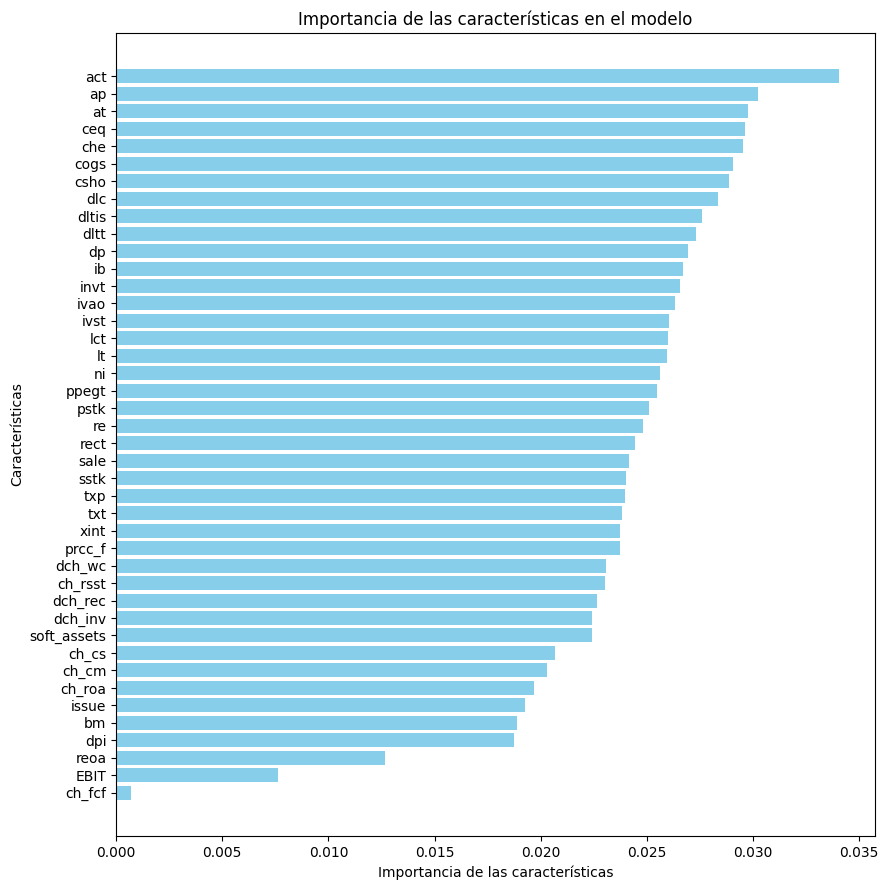

In [39]:
from matplotlib import pyplot as plt
import numpy as np

# Supongamos que feature_importances_sorted es la lista de importancias de características que quieres trazar
# y X_train_scaled.columns es la lista de nombres de características.

# Crear un DataFrame para el gráfico
for_plot = pd.DataFrame({'x_axis': X_train_scaled_2.columns, 'y_axis': feature_importances_sorted_2}).sort_values(by='y_axis', ascending=True)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(9, 9))

# Graficar las barras horizontales
ax.barh(for_plot['x_axis'], for_plot['y_axis'], color='skyblue')

# Ajustar la apariencia de los ejes
ax.set_xlabel('Importancia de las características')
ax.set_ylabel('Características')
ax.set_title('Importancia de las características en el modelo')

# Ajustar el diseño para evitar el solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Reducción número de características con Standard Scaler

In [40]:
#Extraemos las 10 caracteristicas con mas relevancia para el algoritmo
X_reduced_2 = X_train_scaled_2[list(feature_importances_sorted_2.head(10).index)].copy()
X_reduced_2

,soft_assets,dch_rec,dch_wc,ch_cs,csho,cogs,che,ap,ch_cm,dch_inv
0,-0.542534,-0.352795,0.087693,-0.066002,-0.134643,-0.132387,-0.163385,-0.099371,0.187363,0.617145
1,0.221178,-0.158249,0.024701,-0.124241,-0.145024,-0.170142,-0.158084,-0.169542,0.031861,-0.128316
2,1.286888,-0.293794,-0.226241,-0.101422,-0.049764,0.698068,-0.056059,0.307511,-0.010360,-0.476589
3,1.069568,0.103010,0.202627,-0.100448,-0.164268,-0.110891,-0.145436,-0.116346,-0.007096,1.376080
4,-0.980970,-0.051234,0.123574,-0.073367,0.042031,0.027997,0.013675,-0.070351,0.031861,-0.106189
...,...,...,...,...,...,...,...,...,...,...
102226,1.168408,0.818914,0.241094,-0.106070,-0.171945,-0.065293,-0.131473,-0.166451,0.022844,-0.052057
102227,0.383141,0.059925,0.030751,-0.130743,-0.158103,-0.165815,-0.122735,-0.173288,-0.030930,-0.066850
102228,-1.024457,0.169978,0.507092,0.766076,-0.058603,-0.162028,-0.163385,-0.129160,0.182312,-0.128316
102229,0.822712,-0.158249,-4.130840,-0.124241,0.049353,-0.170411,-0.163383,-0.175750,0.031861,-0.456499


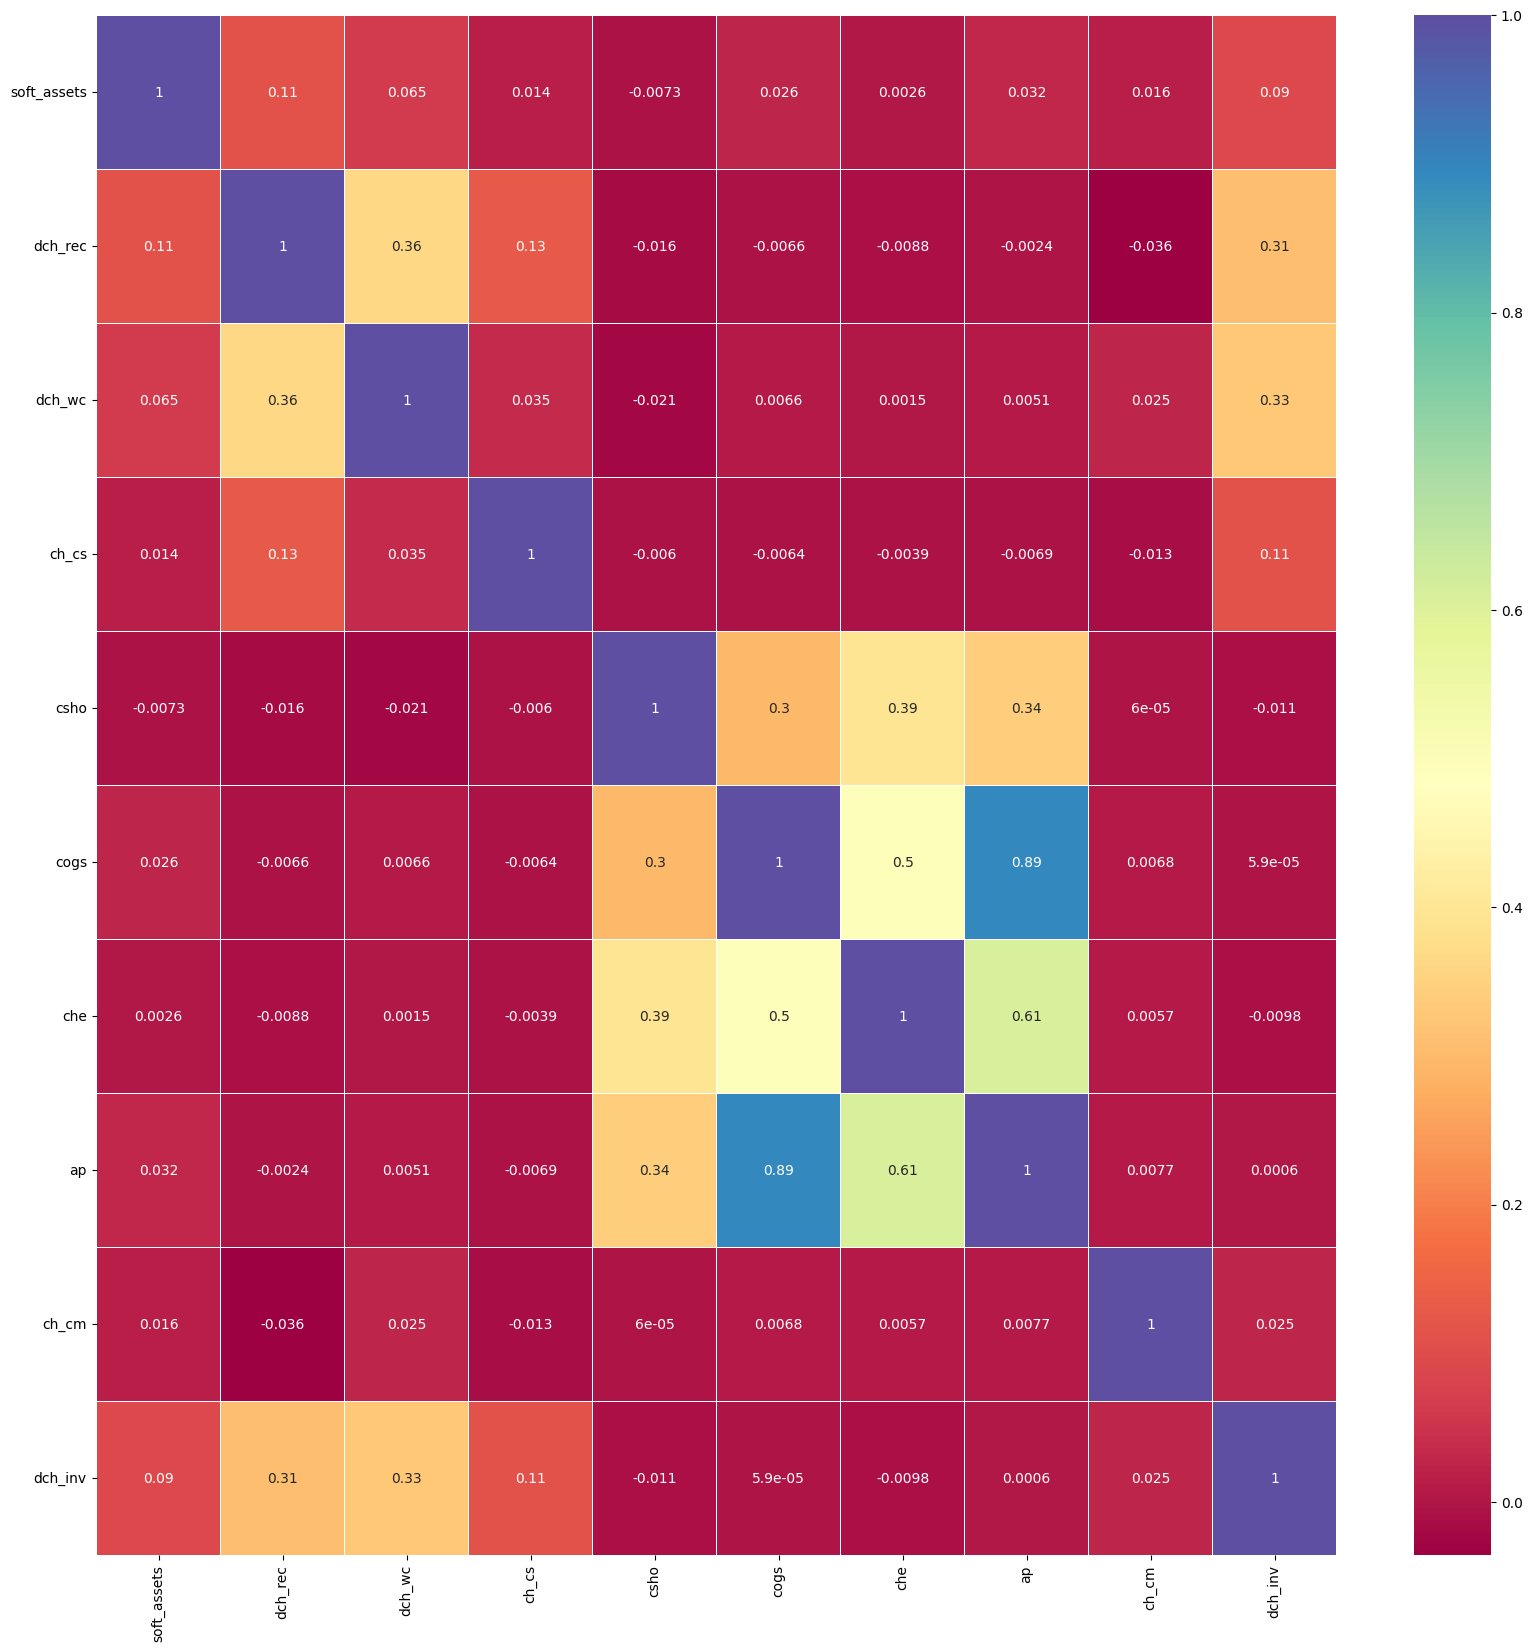

In [42]:
# Creating a correlation heatmap
sns.heatmap(X_reduced_2.corr(),annot=True, cmap='Spectral', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [43]:
#NO esta desbalanceado, no necesita balanceo
y_train.value_counts()

0    101589
1       642
Name: misstate, dtype: int64

In [44]:
X_reduced_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102231 entries, 0 to 102230
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   soft_assets  102231 non-null  float64
 1   dch_rec      102231 non-null  float64
 2   dch_wc       102231 non-null  float64
 3   ch_cs        102231 non-null  float64
 4   csho         102231 non-null  float64
 5   cogs         102231 non-null  float64
 6   che          102231 non-null  float64
 7   ap           102231 non-null  float64
 8   ch_cm        102231 non-null  float64
 9   dch_inv      102231 non-null  float64
dtypes: float64(10)
memory usage: 7.8 MB


In [45]:
print('#### Mezclar la base de datos###############')
#Mezclar la base de datos
X_reduced_2 = X_reduced_2.sample(frac=1).reset_index(drop=True)
X_reduced_2.head(10)

#### Mezclar la base de datos###############


,soft_assets,dch_rec,dch_wc,ch_cs,csho,cogs,che,ap,ch_cm,dch_inv
0,1.502466,0.072838,0.368959,-0.120501,0.114011,2.694134,0.047932,2.608698,0.078440,1.056832
1,0.391374,0.860834,0.206820,-0.240184,-0.123669,-0.137406,-0.108487,-0.141689,-0.022412,-0.777584
2,1.071926,-0.682559,0.483740,-0.021376,-0.159824,-0.170069,-0.162291,-0.173920,0.030456,0.229727
3,1.464902,0.737081,0.576626,0.073788,-0.180125,-0.155700,-0.161322,-0.163165,0.053660,1.532668
4,-1.561899,-0.256023,1.088342,-4.874575,-0.108699,-0.169040,-0.155086,-0.175351,-0.365868,-0.128316
5,-1.785755,-0.155639,-0.430146,-1.051614,0.056651,-0.170800,-0.163273,-0.176055,3.037668,-0.128316
6,0.365261,-0.209566,-0.239080,-0.089765,-0.165256,-0.161697,-0.106705,-0.143895,0.018243,-0.128316
7,1.306215,-0.158249,0.024701,-0.124241,-0.148192,-0.134227,-0.162953,-0.156114,0.031861,-0.128316
8,-0.741208,0.043495,-0.000736,-0.160105,-0.117664,-0.163409,-0.031482,-0.165863,0.018149,-0.128316
9,0.320691,-0.282658,-0.269504,0.045992,0.036189,0.051026,-0.048265,-0.030087,0.019768,-0.348022


# PCA CON OTROS MODELOS

In [46]:
from sklearn.decomposition import PCA

for comp in range(2, X_reduced_2.shape[1]):
    modelo_pca = PCA(n_components= comp)
    modelo_pca.fit(X_reduced_2)
    comp_check = modelo_pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break
        
Final_PCA = PCA(n_components= final_comp)
Final_PCA.fit(X_reduced_2)
cluster_df=Final_PCA.transform(X_reduced_2)

num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))
#con 3 comp explicacion de la variabilidad del 87% con mormalizado

Using 7 components, we can explain 0.8780157452042868% of the variability in the original data.


# Hierachical clustering

In [1]:
# Elbow Method for Heirarchical Clustering
from sklearn.cluster import MiniBatchKMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

# define dataset
# define the model


model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

NameError: name 'cluster_df' is not defined

In [ ]:
# Silhouette Score for Hierarchical Clustering

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

In [ ]:
# Calinski Harabasz Score for Hierarchical Clustering

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

In [ ]:
# Davies Bouldin score for Hierarchical Clustering

from sklearn.metrics import davies_bouldin_score 

def get_AG_clustering_score(data, center):
    '''
    returns the AG_clustering score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit AG_clustering to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the AG_clustering model fit to the data
    '''
    #instantiate AG_clustering
    AG_clustering = AgglomerativeClustering(n_clusters= center)

    # Then fit the model to your data using the fit method
    model = AG_clustering.fit_predict(cluster_df)
    
    # Calculate Silhoutte Score

    score = davies_bouldin_score(cluster_df, model)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_AG_clustering_score(cluster_df, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


df3 = pd.DataFrame(centers,columns=['centers'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of clusters based on DB score:', df4['centers'].tolist())

In [ ]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cluster_df, method='ward'))

In [ ]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

# define the model
model = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat = model.fit(cluster_df)
yhat_2 = model.fit_predict(cluster_df)
# retrieve unique clusters
clusters = unique(yhat)


# Calculate cluster validation metrics

score_AGclustering_s = silhouette_score(cluster_df, yhat.labels_, metric='euclidean')

score_AGclustering_c = calinski_harabasz_score(cluster_df, yhat.labels_)

score_AGclustering_d = davies_bouldin_score(cluster_df, yhat_2)



print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)

print('Davies Bouldin Score: %.4f' % score_AGclustering_d)